## Cats vs dogs

In [ ]:
#|export
from fastai.vision.all import *
import gradio as gr

In [ ]:
#|export
def is_cat(x): return x[0].isUpper()

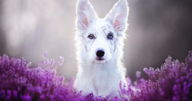

In [3]:
im = PILImage.create('dog.png')
im.thumbnail((192,192))
im

In [ ]:
#|export
learn = load_learner('carOrNotModel.pkl')

/Users/bijay/Developer/huggingface/catIdentifier/myvenv/lib/python3.13/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [6]:
%time learn.predict(im)

CPU times: user 34.4 ms, sys: 62.9 ms, total: 97.3 ms
Wall time: 81.7 ms


('False', tensor(0), tensor([9.9999e-01, 1.2259e-05]))

In [7]:
#/ export
categories = ('dog','cat')
def classify_images(img):
  pred, idx, probs = learn.predict(img)
  return dict(zip(categories,map(float,probs)))

In [8]:
classify_images(im)

{'dog': 0.9999877214431763, 'cat': 1.2259250070201233e-05}

### Gradio Interface Update

In [ ]:
#|export
image = gr.Image(height=192, width=192)
label = gr.Label()
examples = ['dog.png','cat.jpeg','dunno.jpg']

intf = gr.Interface(fn=classify_images, inputs = image, outputs=label, examples=examples)

# code that starts the ui with url:
intf.launch(inline=False, share=true)

In [27]:
import nbdev

notebook_name = "modelRunner.ipynb"
export_destination = "." # the root directory
nbdev.export.nb_export(notebook_name, export_destination) 